In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50504_U')

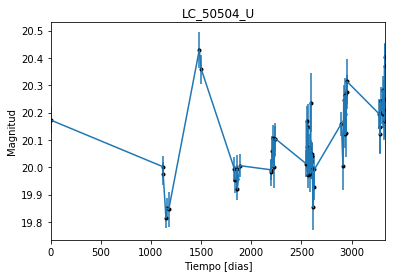

In [2]:
data = np.genfromtxt('LC_50504_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50504_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

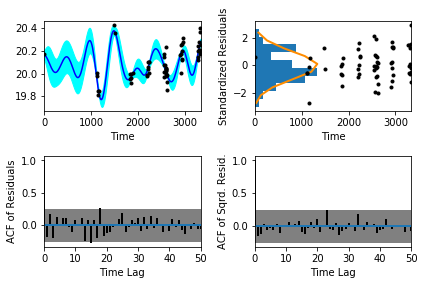

In [5]:
sample.assess_fit()

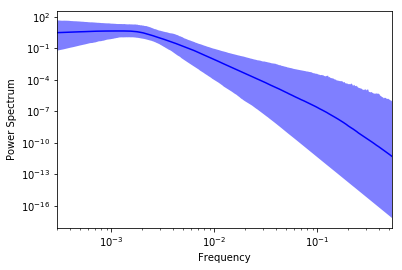

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50504_U')

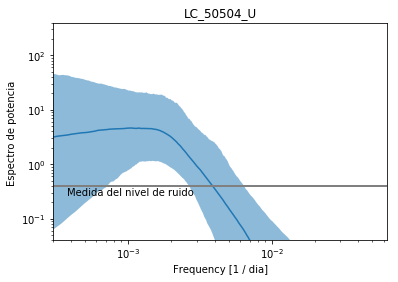

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_U')

Text(0.5,1,'LC_50504_U')

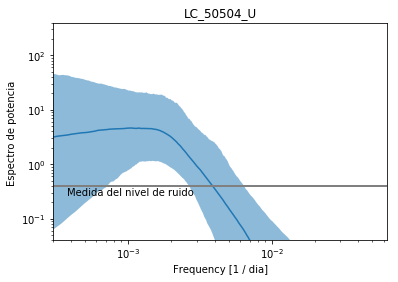

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_U')

Text(0.5,1,'Prediccion , valor esperado LC_50504_U')

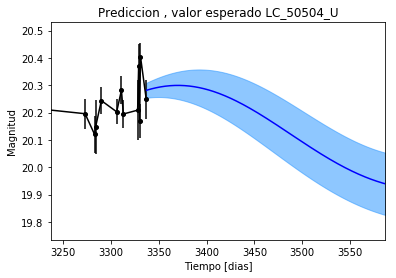

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50504_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50504_U')

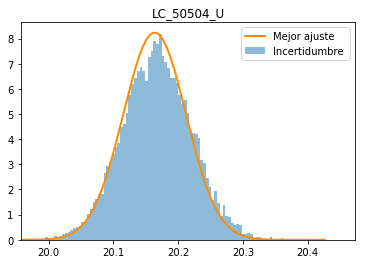

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50504_U')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_U')

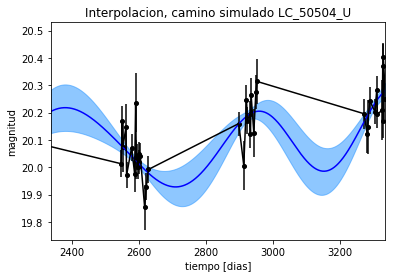

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_U')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_U')

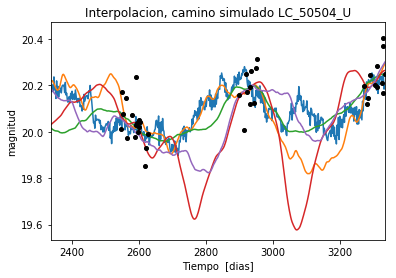

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 480.617519381
Median: 0.00245560202568
Standard deviation: 0.147116137819
68% credibility interval: [ 0.00050416  0.06742157]
95% credibility interval: [  3.18311588e-04   5.66865236e-01]
99% credibility interval: [  3.02669702e-04   9.39662935e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 472.347309723
Median: 0.00125236952397
Standard deviation: 0.0670237090594
68% credibility interval: [ 0.00045214  0.01308453]
95% credibility interval: [ 0.00031493  0.18515801]
99% credibility interval: [  3.02596029e-04   5.33101135e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 808.797354882
Median: 0.00802144828229
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 994.337679878
Median: 93.7880915195
Standard deviation: 1.8701776852
68% credibility interval: [ 91.70719287  95.30345539]
95% credibility interval: [ 89.05016431  96.18150499]
99% credibility interval: [ 86.91236772  96.78311714]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 339.42816275
Median: 0.411800196929
Standard deviation: 1.81446071702
68% credibility interval: [ 0.04004348  2.95929372]
95% credibility interval: [ 0.01327838  6.26192576]
99% credibility interval: [ 0.00960867  8.09261858]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 602.336515485
Median: 0.0708834379645
Standard deviation: 7.47379796117
68% credibility interval: [  2.60976815e-03   3.12077663e+00]
95% credibility interval: [  3.2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 290.231781247
Median: 1.27276358655e-07
Standard deviation: 5.49416858144e+149
68% credibility interval: [  2.73975519e-36   4.07537620e+48]
95% credibility interval: [  1.19486373e-065   1.61439493e+148]
99% credibility interval: [  1.42504111e-084   1.95950401e+150]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2834.7589843
Median: 20.1092318646
Standard deviation: 0.0628403559165
68% credibility interval: [ 20.06101078  20.16141243]
95% credibility interval: [ 20.00271036  20.25434327]
99% credibility interval: [ 19.92807023  20.35160177]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 430.292065522
Median: 0.00225962816166
Standard deviation: 0.214825407943
68% credibility interval: [ 0.          0.19549509]
95% credibility interval: [ 0.          0.83916029]
99% credibility interval: [ 0.          1.01866416]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 430.292065522
Median: 0.00225962816166
Standard deviation: 0.214825407943
68% credibility interval: [ 0.          0.19549509]
95% credibility interval: [ 0.          0.83916029]
99% credibility interval: [ 0.          1.01866416]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 382.928330683
Median: 0.0
Standard deviation: 0.000886332633792
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 994.337679878
Median: 93.7880915195
Standard deviation: 1.8701776852
68% credibility interval: [ 91.70719287  95.30345539]
95% credibility interval: [ 89.05016431  96.18150499]
99% credibility interval: [ 86.91236772  96.78311714]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1262.74011705
Median: 0.0271537087905
Standard deviation: 0.0318625140569
68% credibility interval: [ 0.01646237  0.04965595]
95% credibility interval: [ 0.01101795  0.10679089]
99% credibility interval: [ 0.00818854  0.2026233 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1356.34559416
Median: 1.0988616282
Standard deviation: 0.171581859537
68% credibility interval: [ 0.95551481  1.28632505]
95% credibility interval: [ 0.83552011  1.49161724]
99% credibility interval: [ 0.76630765  1.65091818]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2015.272695
Median: 5.17719644029e-06
Standard deviation: 0.0644215094659
68% credibility interval: [  7.25963115e-53   1.12506268e-03]
95% credibility interval: [  1.44375553e-153   1.54313951e-002]
99% credibility interval: [  3.39387245e-155   2.56932956e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 480.617519381
Median: (-0.015429002568+0j)
Standard deviation: 1.63595992049
68% credibility interval: [-0.42362221-0.09403892j -0.00316776-0.01509819j]
95% credibility interval: [ -3.56171932e+00-0.12565287j  -2.00001069e-03-0.008749j  ]
99% credibility interval: [ -5.90407635e+00+0.j          -1.90172983e-03-0.26225889j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 472.347309723
Median: (-0.00786886979216+0.00623151910549j)
Standard deviation: 1.41395590231
68% credibility interval: [-0.08221253+0.03653447j -0.00284086+0.001217j  ]
95% credibility interval: [-1.16338206+3.57790667j -0.00197879+0.01378078j]
99% credibility interval: [ -3.34957322e+00+4.81261894j  -1.90126692e-03+0.01000001j]
Posterior summary for p